## Market-Basket-Analysis

Using Apriori Algorithm to do Market Basket Analysis of Customers purchasing behaviours. It can predict what the customer is going to buy next by looking at the products he is buying.

#### What is  Market Basket Analysis?

Market Basket Analysis is a modelling technique based upon the theory that if you buy a certain group of items, you are more (or less) likely to buy another group of items. For example, if you are in an English pub and you buy a pint of beer and don't buy a bar meal, you are more likely to buy crisps (US. chips) at the same time than somebody who didn't buy beer.

The set of items a customer buys is referred to as an itemset, and market basket analysis seeks to find relationships between purchases.

#### Typically the relationship will be in the form of a rule:

IF {beer, no bar meal} THEN {crisps}. The probability that a customer will buy beer without a bar meal (i.e. that the antecedent is true) is referred to as the support for the rule. The conditional probability that a customer will purchase crisps is referred to as the confidence. The algorithms for performing market basket analysis are fairly straightforward .

### Apriori Algorithm in Machine Learning

The Apriori algorithm uses frequent itemsets to generate association rules, and it is designed to work on the databases that contain transactions. With the help of these association rule, it determines how strongly or how weakly two objects are connected. This algorithm uses a breadth-first search and Hash Tree to calculate the itemset associations efficiently. It is the iterative process for finding the frequent itemsets from the large dataset.

This algorithm was given by the R. Agrawal and Srikant in the year 1994. It is mainly used for market basket analysis and helps to find those products that can be bought together. It can also be used in the healthcare field to find drug reactions for patients.

#### What is Frequent Itemset?

Frequent itemsets are those items whose support is greater than the threshold value or user-specified minimum support. It means if A & B are the frequent itemsets together, then individually A and B should also be the frequent itemset.

Suppose there are the two transactions: A= {1,2,3,4,5}, and B= {2,3,7}, in these two transactions, 2 and 3 are the frequent itemsets.

#### There are 3 ways to measure association:

1. Support
2. Confidence
3. Lift

#### 1. Support
Support is an indication of how frequently the itemset appears in the dataset.It gives the fraction of transactions which contains item A and B. Basically Support tells us about the frequently bought items or the combination of items bought frequently.

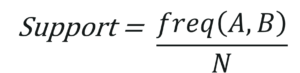

#### 2. Confidence
Confidence is an indication of how often the rule has been found to be true.
It tells us how often the items A and B occur together, given the number times A occurs.
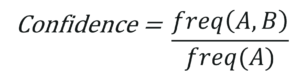

#### 3. Lift
Lift indicates the strength of a rule over the random occurrence of A and B. It basically tells us the strength of any rule.
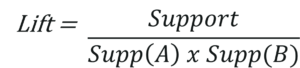

Focus on the denominator, it is the probability of the individual support values of A and B and not together. Lift explains the strength of a rule. More the Lift more is the strength. Let’s say for A -> B, the lift value is 4. It means that if you buy A the chances of buying B is 4 times.

#### Steps for Apriori Algorithm

Below are the steps for the apriori algorithm:

Step-1: Determine the support of itemsets in the transactional database, and select the minimum support and confidence.

Step-2: Take all supports in the transaction with higher support value than the minimum or selected support value.

Step-3: Find all the rules of these subsets that have higher confidence value than the threshold or minimum confidence.

Step-4: Sort the rules as the decreasing order of lift.

#### Advantages of Apriori Algorithm

1. This is easy to understand algorithm
2. The join and prune steps of the algorithm can be easily implemented on large datasets.

#### Disadvantages of Apriori Algorithm

1. The apriori algorithm works slow compared to other algorithms.
2. The overall performance can be reduced as it scans the database for multiple times.
3. The time complexity and space complexity of the apriori algorithm is O(2D), which is very high. Here D represents the horizontal width present in the database

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [167]:
df = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df.shape

(7501, 20)

### Data Visualization

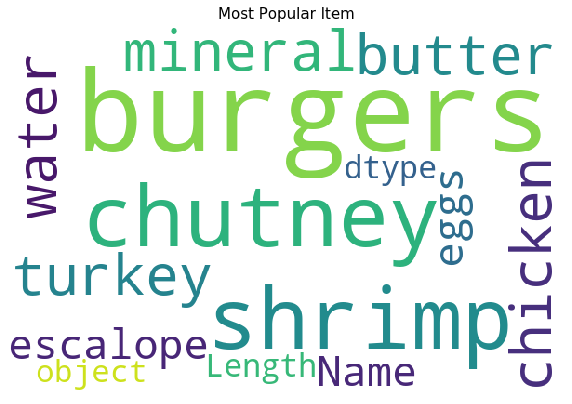

In [169]:
plt.rcParams['figure.figsize'] = (10, 8)
cloud = WordCloud(background_color = 'white', width = 600,  height = 400, max_words = 121).generate(str(df[0]))
plt.imshow(cloud)
plt.title('Most Popular Item', fontsize = 15)
plt.axis('off')
plt.show()

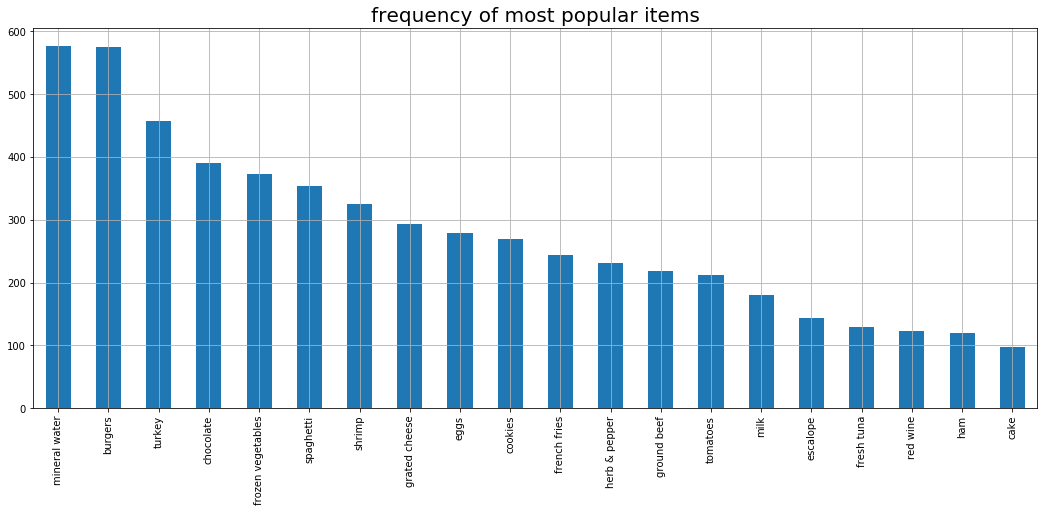

In [180]:
# looking at the frequency of most popular items
plt.rcParams['figure.figsize'] = (18, 7)
df[0].value_counts().head(20).plot.bar()
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

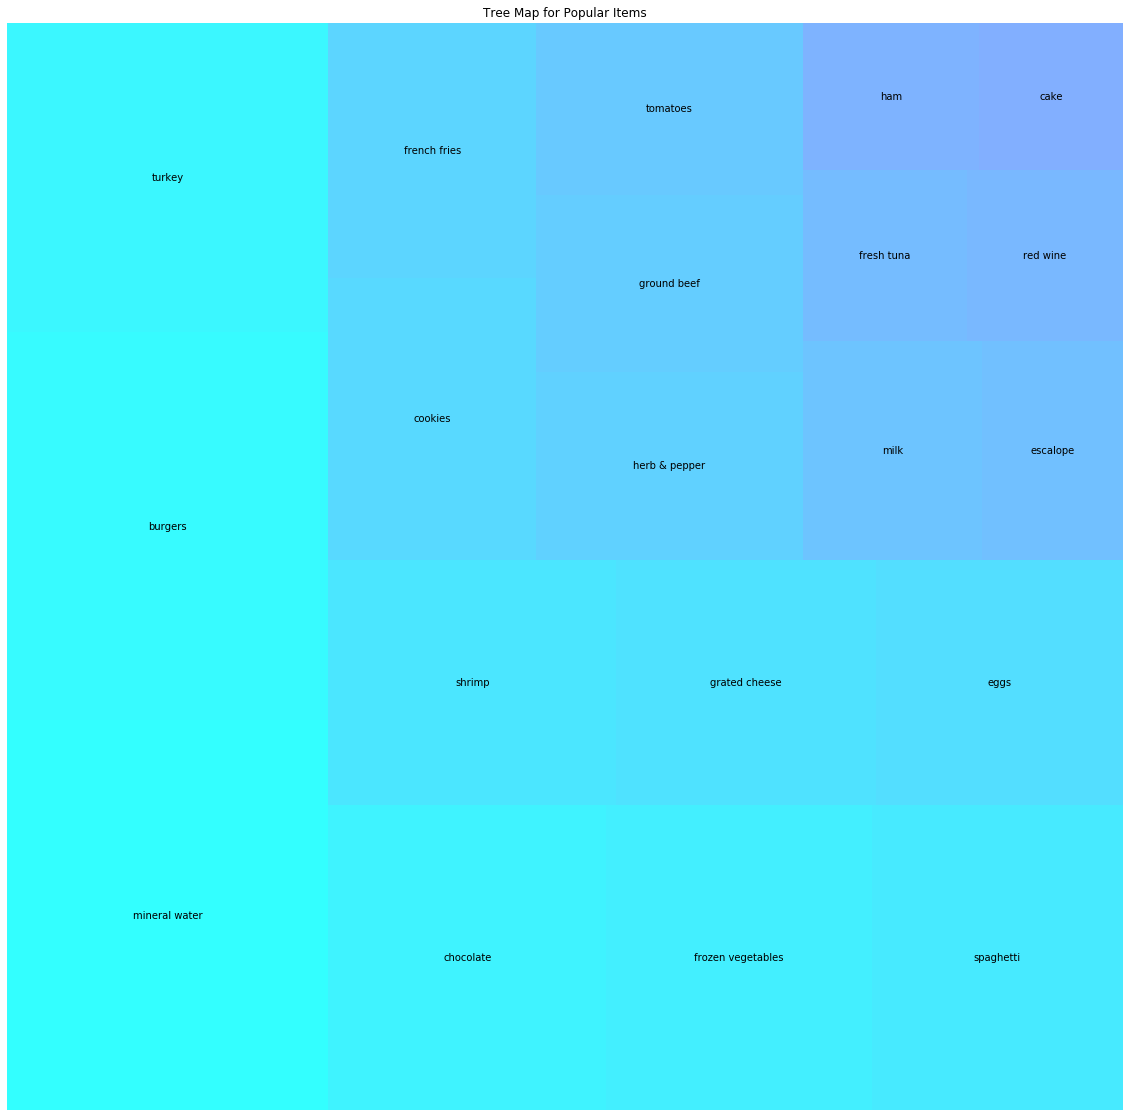

In [175]:
# plotting a tree map
x = df[0].value_counts().head(20)
x.index
import squarify
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = x.values, label = x.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

#### Data Preprocessing

In [89]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(df.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


#### Transaction Encoder

In [90]:
# TRUE if the transaction occurs FALSE if not.
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(7501, 121)

In [93]:
# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

In [94]:
# checking the shape
data.shape

(7501, 40)

In [96]:
# let's check the columns
data.columns

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

In [97]:
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [123]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [124]:
# Generate frequent itemsets that have a support value of at least 5 % 
# Generate the rules with their corresponding support, confidence and lift.
frequent_itemsets = apriori(data, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552
1,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889
2,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1.288075,0.004293,1.099093
3,(mineral water),(turkey),0.238368,0.062525,0.019197,0.080537,1.288075,0.004293,1.019590
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357


A few rules with a high lift value, which means that it occurs more frequently than would be expected given the number of transaction and product combinations
Most of the places the confidence is high as well.

In [145]:
# Filter the dataframe using standard pandas code, for a large lift (3) and high confidence (0.1)
rules[ (rules['lift'] >= 3) & (rules['confidence'] >= 0.1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
236,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.33286
237,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.13541


#### Selecting and Filtering the Results

In [176]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values("support", ascending = False)

,support,itemsets,length
0,0.238368,(mineral water),1
8,0.179709,(eggs),1
5,0.174110,(spaghetti),1
10,0.170911,(french fries),1
3,0.163845,(chocolate),1
16,0.132116,(green tea),1
13,0.129583,(milk),1
11,0.098254,(ground beef),1
4,0.095321,(frozen vegetables),1
17,0.095054,(pancakes),1


In [177]:
frequent_itemsets.sort_values("support", ascending = False).head(5)

,support,itemsets,length
0,0.238368,(mineral water),1
8,0.179709,(eggs),1
5,0.174110,(spaghetti),1
10,0.170911,(french fries),1
3,0.163845,(chocolate),1


In [178]:
frequent_itemsets.sort_values("support", ascending = False).tail(5)

,support,itemsets,length
20,0.058526,(whole wheat rice),1
24,0.052660,"(chocolate, mineral water)",2
7,0.052393,(grated cheese),1
26,0.050927,"(eggs, mineral water)",2
18,0.050527,(soup),1


In [127]:
# getting th item sets with length = 2 and support more than 10%
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
24,0.052660,"(chocolate, mineral water)",2
25,0.059725,"(spaghetti, mineral water)",2
26,0.050927,"(eggs, mineral water)",2


In [181]:
# getting th item sets with length = 1 and support more than 10%
frequent_itemsets[  (frequent_itemsets['length'] == 1) & 
                    (frequent_itemsets['support'] >= 0.01)].sort_values("support", ascending = False)

,support,itemsets,length
0,0.238368,(mineral water),1
8,0.179709,(eggs),1
5,0.174110,(spaghetti),1
10,0.170911,(french fries),1
3,0.163845,(chocolate),1
16,0.132116,(green tea),1
13,0.129583,(milk),1
11,0.098254,(ground beef),1
4,0.095321,(frozen vegetables),1
17,0.095054,(pancakes),1


#### Association Mining

In [129]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
26,0.050927,"(eggs, mineral water)",2


In [130]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'}]

,support,itemsets,length
0,0.238368,(mineral water),1


In [131]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'milk'}]

,support,itemsets,length
13,0.129583,(milk),1


In [132]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chicken'}]

,support,itemsets,length
22,0.059992,(chicken),1


In [133]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'frozen vegetables'}]

,support,itemsets,length
4,0.095321,(frozen vegetables),1


In [134]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chocolate'}]

,support,itemsets,length
3,0.163845,(chocolate),1
